In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
% matplotlib inline

## 使用106年大同負面新聞文本

In [2]:
data = open("大同106news.txt", "r")
data2= data.readlines()

In [3]:
data2

['\ufeff事件內容\n',
 '1.大同增資案惹議，市場派提告。\n',
 '2.大同因現金增資消息曝光、股價重挫，蒸發45億市值，已經損及股東權益，市場派股東106/12/28在台北地檢署\n',
 '告發。大同再重申，董事會決議是在額定股本內對原股東的現金增資，從未涉入股市，對於股價是否遭人為操縱，\n',
 '公司無從得知，至於日前針對大同股票價格波動過度劇烈等情事，已依規定自25日起降低融資比率一成及提高融券\n',
 '保證金一成。\n',
 '3.市場派欣同發聲明指出，大同董事會通過包括以每股面額10元辦理現金增資5億股等4項決議，表面上完成增資後\n',
 '，將可改善財務結構，強化公司競爭力，但5億股現增案，雖表示發行價格暫時未定，市場消息傳出大同預定將以1\n',
 '4元辦理現增，由於市價仍有19元，導致消息一出，隔日起大同股價連續重挫，最低點來到17.2元。\n',
 '1.高院判林蔚山需賠22億，最高院發回重審。\n',
 '2.投保中心控訴大同董事長林蔚山造成公司損失、應予賠償，台灣高等法院原判決林蔚山共需賠償22億元，但最高\n',
 '法院廢棄高院的原判決，並發回重新審理。\n',
 '"3.最高法院判決理由有5項：(1)尚志資產給通達公司的貸款尚餘6,900萬未清償，何以按持股比例48.566%計算大同"\n',
 '"公司因此所受損害為3,350萬？原審並未說明理由。(2)林蔚山行為有無造成大同於96年到99年各年度投資損失達17"\n',
 '億餘元？高院未調查，徒以尚志投資以1元投資通達，大同借貸尚志投資，及尚志投資借貸通達公司的款項，就認\n',
 '定大同有損害，不無可議。(3)高院原認定尚志投資以1元投資，取得通達50.36%的股份，不是合併，故不承受該公\n',
 '司損失，也不是大同受損害的計算基礎；若果真如此，尚志投資1元投資通達的行為，是否致大同受損害，尚非無\n',
 '疑。(4)有關大同增資股款、溢價發行新股股款匯入尚志投資，原審逕認是借貸，違反公司法第15條第一項規定，\n',
 '違背對大同公司的忠實及注意義務，不無認作主張事實的違法。(5)99/3通達董事會決議停業，後續如何償還銀行\n',
 '款項，經與銀行溝通及律師建議，為避免影響集團債信，由原本就是連保人的尚志投資代償；原審未加審究，遽認\n

In [4]:
for i in range(len(data2)):
    data2[i] = data2[i].strip()

In [5]:
for i in range(len(data2)):
    data2[i] = data2[i].replace(" ", "")

In [6]:
for i in data2:
    if "" in data2:
        data2.remove("")

In [7]:
data2

['\ufeff事件內容',
 '1.大同增資案惹議，市場派提告。',
 '2.大同因現金增資消息曝光、股價重挫，蒸發45億市值，已經損及股東權益，市場派股東106/12/28在台北地檢署',
 '告發。大同再重申，董事會決議是在額定股本內對原股東的現金增資，從未涉入股市，對於股價是否遭人為操縱，',
 '公司無從得知，至於日前針對大同股票價格波動過度劇烈等情事，已依規定自25日起降低融資比率一成及提高融券',
 '保證金一成。',
 '3.市場派欣同發聲明指出，大同董事會通過包括以每股面額10元辦理現金增資5億股等4項決議，表面上完成增資後',
 '，將可改善財務結構，強化公司競爭力，但5億股現增案，雖表示發行價格暫時未定，市場消息傳出大同預定將以1',
 '4元辦理現增，由於市價仍有19元，導致消息一出，隔日起大同股價連續重挫，最低點來到17.2元。',
 '1.高院判林蔚山需賠22億，最高院發回重審。',
 '2.投保中心控訴大同董事長林蔚山造成公司損失、應予賠償，台灣高等法院原判決林蔚山共需賠償22億元，但最高',
 '法院廢棄高院的原判決，並發回重新審理。',
 '"3.最高法院判決理由有5項：(1)尚志資產給通達公司的貸款尚餘6,900萬未清償，何以按持股比例48.566%計算大同"',
 '"公司因此所受損害為3,350萬？原審並未說明理由。(2)林蔚山行為有無造成大同於96年到99年各年度投資損失達17"',
 '億餘元？高院未調查，徒以尚志投資以1元投資通達，大同借貸尚志投資，及尚志投資借貸通達公司的款項，就認',
 '定大同有損害，不無可議。(3)高院原認定尚志投資以1元投資，取得通達50.36%的股份，不是合併，故不承受該公',
 '司損失，也不是大同受損害的計算基礎；若果真如此，尚志投資1元投資通達的行為，是否致大同受損害，尚非無',
 '疑。(4)有關大同增資股款、溢價發行新股股款匯入尚志投資，原審逕認是借貸，違反公司法第15條第一項規定，',
 '違背對大同公司的忠實及注意義務，不無認作主張事實的違法。(5)99/3通達董事會決議停業，後續如何償還銀行',
 '款項，經與銀行溝通及律師建議，為避免影響集團債信，由原本就是連保人的尚志投資代償；原審未加審究，遽認',
 '尚志投資上開行為是林蔚山指示而為，為不利的判斷，並有可議。',
 '1

In [8]:
data3 = "，"
data3 = data3.join(data2)
data3

'\ufeff事件內容，1.大同增資案惹議，市場派提告。，2.大同因現金增資消息曝光、股價重挫，蒸發45億市值，已經損及股東權益，市場派股東106/12/28在台北地檢署，告發。大同再重申，董事會決議是在額定股本內對原股東的現金增資，從未涉入股市，對於股價是否遭人為操縱，，公司無從得知，至於日前針對大同股票價格波動過度劇烈等情事，已依規定自25日起降低融資比率一成及提高融券，保證金一成。，3.市場派欣同發聲明指出，大同董事會通過包括以每股面額10元辦理現金增資5億股等4項決議，表面上完成增資後，，將可改善財務結構，強化公司競爭力，但5億股現增案，雖表示發行價格暫時未定，市場消息傳出大同預定將以1，4元辦理現增，由於市價仍有19元，導致消息一出，隔日起大同股價連續重挫，最低點來到17.2元。，1.高院判林蔚山需賠22億，最高院發回重審。，2.投保中心控訴大同董事長林蔚山造成公司損失、應予賠償，台灣高等法院原判決林蔚山共需賠償22億元，但最高，法院廢棄高院的原判決，並發回重新審理。，"3.最高法院判決理由有5項：(1)尚志資產給通達公司的貸款尚餘6,900萬未清償，何以按持股比例48.566%計算大同"，"公司因此所受損害為3,350萬？原審並未說明理由。(2)林蔚山行為有無造成大同於96年到99年各年度投資損失達17"，億餘元？高院未調查，徒以尚志投資以1元投資通達，大同借貸尚志投資，及尚志投資借貸通達公司的款項，就認，定大同有損害，不無可議。(3)高院原認定尚志投資以1元投資，取得通達50.36%的股份，不是合併，故不承受該公，司損失，也不是大同受損害的計算基礎；若果真如此，尚志投資1元投資通達的行為，是否致大同受損害，尚非無，疑。(4)有關大同增資股款、溢價發行新股股款匯入尚志投資，原審逕認是借貸，違反公司法第15條第一項規定，，違背對大同公司的忠實及注意義務，不無認作主張事實的違法。(5)99/3通達董事會決議停業，後續如何償還銀行，款項，經與銀行溝通及律師建議，為避免影響集團債信，由原本就是連保人的尚志投資代償；原審未加審究，遽認，尚志投資上開行為是林蔚山指示而為，為不利的判斷，並有可議。，1.高等法院就本公司董事長因違反證券交易法乙案，裁定就董事長所有之不動產，及股票予以扣押。經董事長提起抗告後，遭最高法院裁定駁回抗告。，2.本公司林蔚山董事長對最高法院之裁

In [9]:
dictlist = ['大同公司','交易稅', '台北', '臺北','董事長','林蔚山','延長','董事','林宏信','臺北地方法院']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()

In [10]:
stopwords = ['我', '對', '\n', '年', '月', '的', '1', '2', '(', ')', '/', '於', '大同', '公司', '4', '106', '臺', '本', '人', '為', '之', '北', '5', '有', '元']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [11]:
jieba.add_word('董事長')
jieba.load_userdict('dict.txt')
seg_list = jieba.cut(data3, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zz/bqrx4v8s4cq4vszqlfzpp6_40000gn/T/jieba.cache
Loading model cost 0.868 seconds.
Prefix dict has been built succesfully.


Default Mode: ﻿/ 事件/ 內容/ ，/ 1/ ./ 大同/ 增資案/ 惹議/ ，/ 市場/ 派/ 提告/ 。/ ，/ 2/ ./ 大同/ 因現/ 金/ 增資/ 消息/ 曝光/ 、/ 股價/ 重挫/ ，/ 蒸發/ 45/ 億/ 市值/ ，/ 已經/ 損及/ 股東/ 權益/ ，/ 市場/ 派/ 股東/ 106/ // 12/ // 28/ 在/ 台北/ 地檢署/ ，/ 告發/ 。/ 大同/ 再/ 重申/ ，/ 董事/ 會/ 決議/ 是/ 在/ 額定/ 股本/ 內/ 對/ 原/ 股東/ 的/ 現金/ 增資/ ，/ 從/ 未/ 涉入/ 股市/ ，/ 對/ 於/ 股價/ 是否/ 遭人為/ 操縱/ ，/ ，/ 公司/ 無/ 從/ 得知/ ，/ 至於/ 日前/ 針對/ 大同/ 股票/ 價格/ 波動/ 過度/ 劇烈/ 等/ 情事/ ，/ 已/ 依規定/ 自/ 25/ 日起/ 降低/ 融資/ 比率/ 一成/ 及/ 提高/ 融券/ ，/ 保證/ 金一成/ 。/ ，/ 3/ ./ 市場/ 派/ 欣同/ 發聲明/ 指出/ ，/ 大同/ 董事/ 會/ 通過/ 包括/ 以/ 每股/ 面額/ 10/ 元/ 辦理/ 現金/ 增資/ 5/ 億股/ 等/ 4/ 項決議/ ，/ 表面/ 上/ 完成/ 增資/ 後/ ，/ ，/ 將可/ 改善/ 財務/ 結構/ ，/ 強化/ 公司/ 競爭力/ ，/ 但/ 5/ 億股現/ 增案/ ，/ 雖/ 表示/ 發行/ 價格/ 暫時/ 未定/ ，/ 市場/ 消息/ 傳出/ 大同/ 預定/ 將以/ 1/ ，/ 4/ 元/ 辦理/ 現增/ ，/ 由/ 於/ 市價/ 仍/ 有/ 19/ 元/ ，/ 導致/ 消息/ 一出/ ，/ 隔日/ 起/ 大同/ 股價/ 連續/ 重挫/ ，/ 最低/ 點來/ 到/ 17.2/ 元/ 。/ ，/ 1/ ./ 高院/ 判/ 林蔚山/ 需賠/ 22/ 億/ ，/ 最高院/ 發回/ 重審/ 。/ ，/ 2/ ./ 投保/ 中心/ 控訴/ 大同/ 董事長/ 林蔚山/ 造成/ 公司/ 損失/ 、/ 應予/ 賠償/ ，/ 台灣/ 高等法院/ 原判/ 決/ 林蔚山/ 共需/ 賠償/ 22/ 億元/ ，/ 但/ 最高/ ，/ 法院/ 廢棄/ 高院/ 的/ 原判/ 決/ ，/ 並發/ 回/ 重新/ 審理/ 。/ ，/ "/ 3/ ./ 最高法院/

In [12]:
seg_list = jieba.cut(data3, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print(wordDict)

{'\ufeff': 1, '事件': 1, '內容': 1, '增資案': 2, '惹議': 1, '市場': 8, '派': 6, '提告': 1, '因現': 1, '金': 3, '增資': 6, '消息': 4, '曝光': 1, '股價': 4, '重挫': 2, '蒸發': 1, '45': 1, '億': 4, '市值': 1, '已經': 1, '損及': 1, '股東': 3, '權益': 1, '12': 1, '28': 1, '在': 5, '台北': 2, '地檢署': 1, '告發': 1, '再': 3, '重申': 1, '董事': 31, '會': 5, '決議': 2, '是': 5, '額定': 1, '股本': 1, '內': 1, '原': 4, '現金': 4, '從': 2, '未': 4, '涉入': 1, '股市': 1, '是否': 2, '遭人為': 1, '操縱': 1, '無': 4, '得知': 1, '至於': 1, '日前': 2, '針對': 3, '股票': 4, '價格': 2, '波動': 1, '過度': 1, '劇烈': 1, '等': 3, '情事': 1, '已': 6, '依規定': 1, '自': 1, '25': 1, '日起': 1, '降低': 1, '融資': 1, '比率': 1, '一成': 1, '及': 7, '提高': 1, '融券': 1, '保證': 1, '金一成': 1, '3': 8, '欣同': 9, '發聲明': 1, '指出': 2, '通過': 2, '包括': 1, '以': 1, '每股': 1, '面額': 1, '10': 4, '辦理': 2, '億股': 3, '項決議': 1, '表面': 1, '上': 1, '完成': 1, '後': 5, '將可': 1, '改善': 1, '財務': 3, '結構': 1, '強化': 1, '競爭力': 1, '但': 4, '億股現': 1, '增案': 1, '雖': 1, '表示': 1, '發行': 2, '暫時': 3, '未定': 1, '傳出': 3, '預定': 1, '將以': 1, '現增': 1, '由': 3, '市價': 1, '仍': 1, '19': 1, '

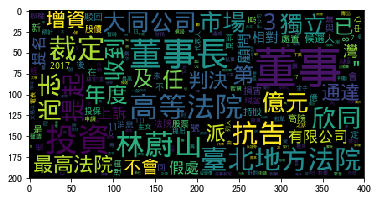

In [13]:
font = r"/Users/liangpeiru/Downloads/碩二/資本市場/wqy-microhei.ttc"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [14]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('董事', 31),
 ('董事長', 16),
 ('投資', 15),
 ('林蔚山', 12),
 ('高等法院', 11),
 ('裁定', 11),
 ('抗告', 10),
 ('臺北地方法院', 10),
 ('欣同', 9),
 ('尚志', 9)]

In [15]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0x115581e10>,
 <a list of 10 Text xticklabel objects>)

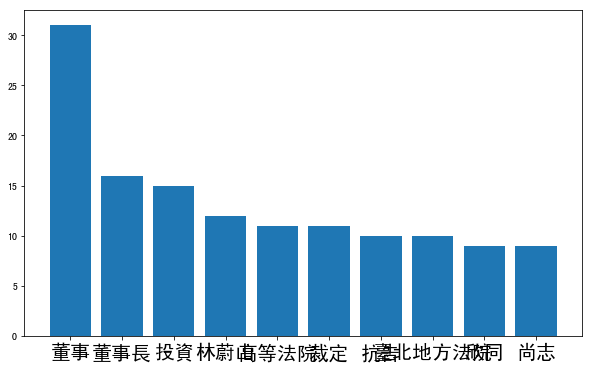

In [16]:
plt.figure(figsize=(10,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)

出現董事長、林蔚山、投資、地方法院、高等法院、裁定等，推測董事長可能有法律問題

# 相關新聞：林蔚山涉大同掏空案 遭扣押土地和股票(171020)
![林蔚山1](林蔚山1.png)
![林蔚山2](林蔚山2.png)